<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dependencies" data-toc-modified-id="Load-dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dependencies</a></span></li><li><span><a href="#Read-csv-files-to-DFs" data-toc-modified-id="Read-csv-files-to-DFs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read csv files to DFs</a></span></li><li><span><a href="#Fill-missing-values" data-toc-modified-id="Fill-missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fill missing values</a></span></li><li><span><a href="#Add-date-part" data-toc-modified-id="Add-date-part-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add date part</a></span></li><li><span><a href="#Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc." data-toc-modified-id="Add-extra-columns-(purchased-on-weekend,-monthend,-month_diff-etc.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add extra columns (purchased on weekend, monthend, month_diff etc.</a></span></li><li><span><a href="#De-normalizing-purchase-amount-column" data-toc-modified-id="De-normalizing-purchase-amount-column-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>De normalizing purchase amount column</a></span></li><li><span><a href="#Rolling-aggregate-on-month" data-toc-modified-id="Rolling-aggregate-on-month-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Rolling aggregate on month</a></span></li><li><span><a href="#Time-between-successive-transactions" data-toc-modified-id="Time-between-successive-transactions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Time between successive transactions</a></span></li><li><span><a href="#Additional-features" data-toc-modified-id="Additional-features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Additional features</a></span></li><li><span><a href="#Latest-&amp;-First-5-col-aggregates" data-toc-modified-id="Latest-&amp;-First-5-col-aggregates-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Latest &amp; First 5 col aggregates</a></span></li><li><span><a href="#Merge-merchants-df" data-toc-modified-id="Merge-merchants-df-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Merge merchants df</a></span></li><li><span><a href="#Aggregate-by-card_id" data-toc-modified-id="Aggregate-by-card_id-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Aggregate by card_id</a></span></li><li><span><a href="#Add-exta-interpreted-columns-on-aggregates" data-toc-modified-id="Add-exta-interpreted-columns-on-aggregates-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Add exta interpreted columns on aggregates</a></span></li><li><span><a href="#Aggregate-on-categories" data-toc-modified-id="Aggregate-on-categories-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Aggregate on categories</a></span></li><li><span><a href="#Aggregate-on-month" data-toc-modified-id="Aggregate-on-month-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Aggregate on month</a></span></li><li><span><a href="#Load-test-&amp;-train-DFs" data-toc-modified-id="Load-test-&amp;-train-DFs-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Load test &amp; train DFs</a></span></li><li><span><a href="#Add-observed-date" data-toc-modified-id="Add-observed-date-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Add observed date</a></span></li><li><span><a href="#Merge-train-&amp;-test-with-new-&amp;-old-transactions-history" data-toc-modified-id="Merge-train-&amp;-test-with-new-&amp;-old-transactions-history-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Merge train &amp; test with new &amp; old transactions history</a></span></li><li><span><a href="#Adding-train-days" data-toc-modified-id="Adding-train-days-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Adding train days</a></span></li><li><span><a href="#Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc" data-toc-modified-id="Add-extra-columns-like-age,-total-transactions,-installments,-purchase-amount,-first-buy-etc-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Add extra columns like age, total transactions, installments, purchase amount, first buy etc</a></span></li><li><span><a href="#Redo-some-date-features-with-observed-time" data-toc-modified-id="Redo-some-date-features-with-observed-time-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Redo some date features with observed time</a></span></li><li><span><a href="#Mark-the-outliers" data-toc-modified-id="Mark-the-outliers-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Mark the outliers</a></span></li><li><span><a href="#Target-encode-the-outliers" data-toc-modified-id="Target-encode-the-outliers-23"><span class="toc-item-num">23&nbsp;&nbsp;</span>Target encode the outliers</a></span></li><li><span><a href="#Scrap-pad" data-toc-modified-id="Scrap-pad-24"><span class="toc-item-num">24&nbsp;&nbsp;</span>Scrap pad</a></span></li><li><span><a href="#Transform-purchase_value-to-actual-amount" data-toc-modified-id="Transform-purchase_value-to-actual-amount-25"><span class="toc-item-num">25&nbsp;&nbsp;</span>Transform purchase_value to actual amount</a></span></li></ul></div>

1. Load dependencies
2. Read csv files to dataframes
3. Fill missing values
4. Add date part 
5. Add extra columns (purchased on weekend, monthend, month_diff etc.
6. Aggregate by card_id
7. Aggregate by categories
8. Mark categorical columns
9. Add exta interpreted columns on aggregates
10. Load test & train csvs to dfs
11. Add date part to test & train dfs
12. Merge train & test with new & old transactions history
13. Add extra columns like age, total transactions, installments, purchase amount, first buy etc
14. Mark the outliers
15. Target encode the outliers 
16. Save to feather

### Load dependencies

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 4
%autosave 120

Autosaving every 120 seconds


In [1]:
from fastai.io import *
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from pandas_summary import DataFrameSummary
from IPython.display import display
from sklearn import metrics
import feather
import gc

### Read csv files to DFs

In [20]:
PATH = '../data/elo/'

In [4]:
files = ['historical_transactions', 'new_merchant_transactions']

In [5]:
hist_trans, new_hist_trans = [pd.read_csv(f'{PATH}{c}.csv') for c in files]

### Fill missing values

Let's have a look at the transactions data available.

In [8]:
hist_trans.head().T

,0,1,2,3,4
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc,C_ID_4e6213e9bc
city_id,88,88,88,88,88
category_1,N,N,N,N,N
installments,0,0,0,0,0
category_3,A,A,A,A,A
merchant_category_id,80,367,80,560,80
merchant_id,M_ID_e020e9b302,M_ID_86ec983688,M_ID_979ed661fc,M_ID_e6d5ae8ea6,M_ID_e020e9b302
month_lag,-8,-7,-6,-5,-11
purchase_amount,-0.703331,-0.733128,-0.720386,-0.735352,-0.722865


In [9]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,N,N,N,Y,Y
installments,1,1,1,1,1
category_3,B,B,B,B,B
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,-0.557574,-0.56958,-0.551037,-0.671925,-0.659904


Let's see data dictionary to find out what each of these fields mean.

| train.csv          |                                                                                    |
|--------------------|------------------------------------------------------------------------------------|
| card_id            | Unique card identifier                                                             |
| first_active_month | YYYY-MM', month of first purchase                                                  |
| feature_1          | Anonymized card categorical feature                                                |
| feature_2          | Anonymized card categorical feature                                                |
| feature_3          | Anonymized card categorical feature                                                |
| target             | Loyalty numerical score calculated 2 months after historical and evaluation period |

| historical_transactions.csv |                                                  |
|-----------------------------|--------------------------------------------------|
| card_id                     | Card identifier                                  |
| month_lag                   | month lag to reference date                      |
| purchase_date               | Purchase date                                    |
| authorized_flag             | Y' if approved, 'N' if denied                    |
| category_3                  | anonymized category                              |
| installments                | number of installments of purchase               |
| category_1                  | anonymized category                              |
| merchant_category_id        | Merchant category identifier (anonymized )       |
| subsector_id                | Merchant category group identifier (anonymized ) |
| merchant_id                 | Merchant identifier (anonymized)                 |
| purchase_amount             | Normalized purchase amount                       |
| city_id                     | City identifier (anonymized )                    |
| state_id                    | State identifier (anonymized )                   |
| category_2                  | anonymized category                              |

| new_merchant_period.csv |                                                  |
|-------------------------|--------------------------------------------------|
| card_id                 | Card identifier                                  |
| month_lag               | month lag to reference date                      |
| purchase_date           | Purchase date                                    |
| authorized_flag         | Y' if approved, 'N' if denied                    |
| category_3              | anonymized category                              |
| installments            | number of installments of purchase               |
| category_1              | anonymized category                              |
| merchant_category_id    | Merchant category identifier (anonymized )       |
| subsector_id            | Merchant category group identifier (anonymized ) |
| merchant_id             | Merchant identifier (anonymized)                 |
| purchase_amount         | Normalized purchase amount                       |
| city_id                 | City identifier (anonymized )                    |
| state_id                | State identifier (anonymized )                   |
| category_2              | anonymized category                              |

| merchants.csv               |                                                                                                |
|-----------------------------|------------------------------------------------------------------------------------------------|
| merchant_id                 | Unique merchant identifier                                                                     |
| merchant_group_id           | Merchant group (anonymized )                                                                   |
| merchant_category_id        | Unique identifier for merchant category (anonymized )                                          |
| subsector_id                | Merchant category group (anonymized )                                                          |
| numerical_1                 | anonymized measure                                                                             |
| numerical_2                 | anonymized measure                                                                             |
| category_1                  | anonymized category                                                                            |
| most_recent_sales_range     | Range of revenue (monetary units) in last active month --> A > B > C > D > E                   |
| most_recent_purchases_range | Range of quantity of transactions in last active month --> A > B > C > D > E                   |
| avg_sales_lag3              | Monthly average of revenue in last 3 months divided by revenue in last active month            |
| avg_purchases_lag3          | Monthly average of transactions in last 3 months divided by transactions in last active month  |
| active_months_lag3          | Quantity of active months within last 3 months                                                 |
| avg_sales_lag6              | Monthly average of revenue in last 6 months divided by revenue in last active month            |
| avg_purchases_lag6          | Monthly average of transactions in last 6 months divided by transactions in last active month  |
| active_months_lag6          | Quantity of active months within last 6 months                                                 |
| avg_sales_lag12             | Monthly average of revenue in last 12 months divided by revenue in last active month           |
| avg_purchases_lag12         | Monthly average of transactions in last 12 months divided by transactions in last active month |
| active_months_lag12         | Quantity of active months within last 12 months                                                |
| category_4                  | anonymized category                                                                            |
| city_id                     | City identifier (anonymized )                                                                  |
| state_id                    | State identifier (anonymized )                                                                 |
| category_2                  | anonymized category                                                                            |

Let's start with transactions data. We will come back to merchants & cards data later. We have ~1.9m new & ~2.9m historical transactions data. This can be joined with cards & merchants data on `card_id` and `merchant_id` respectively. But should we? We will find out later.

In [8]:
new_hist_trans.shape, hist_trans.shape

((1963031, 14), (29112361, 14))

Now the missing values percent for each of the columns in the transactions data

In [10]:
hist_trans.isnull().sum()/len(new_hist_trans)

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.090757
merchant_category_id    0.000000
merchant_id             0.070544
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              1.351412
state_id                0.000000
subsector_id            0.000000
dtype: float64

In [11]:
new_hist_trans.isnull().sum()/len(new_hist_trans)

authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.028488
merchant_category_id    0.000000
merchant_id             0.013355
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              0.056925
state_id                0.000000
subsector_id            0.000000
dtype: float64

It's a standard practice to remove the rows which have missing data. Doing that had negative impact in the leaderboard score for me & others in the competition. So I decided to fill in the missing values with mode for categorical columns & for installments with -1 & 999. 

Let's map `category_1` & `category_3` as categorical columns with key & value.

In [12]:
def fill_nas_for_transactions_df(df):
    # Fill nas for category_3 with mode
    df['category_2'].fillna(1.0,inplace=True)
    df['category_3'].fillna('A',inplace=True)
    df['merchant_id'].fillna('M_ID_00a6ca8a8a',inplace=True)
    df['installments'].replace(-1, np.nan,inplace=True)
    df['installments'].replace(999, np.nan,inplace=True)
    df['category_1'] = df['category_1'].map({'Y':1, 'N':0}) 
    df['category_3'] = df['category_3'].map({'A':0, 'B':1, 'C':2})
    return df

In [13]:
dfs = [hist_trans, new_hist_trans]

In [14]:
hist_trans, new_hist_trans = [fill_nas_for_transactions_df(df) for df in dfs]

### Add date part

fast.ai library provides excellent utility functions. We will be leveraging functions from fast.ai throughout for data manipulation & feature engineering starting with date field. `add_datepart` function reads a date and generates additional interpreted fields which are very useful for feature engineering.

In [15]:
add_datepart(hist_trans, 'purchase_date', drop=False, time=True)
add_datepart(new_hist_trans, 'purchase_date', drop=False, time=True)

In [16]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,0,0,0,1,1
installments,1,1,1,1,1
category_3,1,1,1,1,1
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,-0.557574,-0.56958,-0.551037,-0.671925,-0.659904


### Add extra columns (purchased on weekend, monthend, month_diff etc.

`add_datepart` already added columns like `'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'` to our dataframe. Let's add some more columns like if the transaction has been done on weekday or weekend, `month_diff` which says the months since the reference date. We will find out later that these columns turned out to be pretty strong features.

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


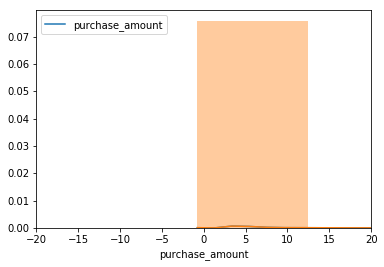

In [10]:
sns.kdeplot(new_hist_trans['purchase_amount'])
# sns.kdeplot(new_hist_trans['purchase_amount'], bw=.2, label="bw: 0.2")
# sns.kdeplot(new_hist_trans['purchase_amount'])
plt.legend();
plt.xlim(-20,20)
sns.distplot(new_hist_trans['purchase_amount'], bins=20, kde=True, rug=False);

In [17]:
def add_extra_cols(df):
    df['purchased_on_weekend'] = (df.purchase_Dayofweek >=5).astype(int)
    df['purchased_on_weekday'] = (df.purchase_Dayofweek <5).astype(int)
    df['month_diff'] = ((datetime.datetime.today() - df['purchase_date']).dt.days)//30
    df['month_diff'] += df['month_lag']
    df['authorized_flag'] = df['authorized_flag'].map({'Y':1, 'N':0})
#     Trim the purchase_amount
#     df['purchase_amount'] = df['purchase_amount'].apply(lambda x: min(x, 0.8)) 
    return df

In [18]:
hist_trans, new_hist_trans = [add_extra_cols(df) for df in dfs]

In [19]:
hist_trans.shape, new_hist_trans.shape

((29112361, 33), (1963031, 33))

In [20]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,1,1,1,1,1
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,0,0,0,1,1
installments,1,1,1,1,1
category_3,1,1,1,1,1
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,-0.557574,-0.56958,-0.551037,-0.671925,-0.659904


### De normalizing purchase amount column

The `purchase_amount` column is normalized and heavily transformed. Let's try to reverse engineer it to get the actual amount. We will solve a simple optimisation function to make the least value of purchase amount to be non-negative and get the regression co-efficients. We will round them to 2 decimals

In [22]:
new_hist_trans['purchase_amount'] = np.round(new_hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)
hist_trans['purchase_amount'] = np.round(hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)

In [23]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,1,1,1,1,1
card_id,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_415bb3a509,C_ID_ef55cf8d4b
city_id,107,140,330,-1,-1
category_1,0,0,0,1,1
installments,1,1,1,1,1
category_3,1,1,1,1,1
merchant_category_id,307,307,507,661,166
merchant_id,M_ID_b0c793002c,M_ID_88920c89e8,M_ID_ad5237ef6b,M_ID_9e84cda3b1,M_ID_3c86fa3831
month_lag,1,1,2,1,1
purchase_amount,84348.9,79031.6,87243.7,33705,39029


### Rolling aggregate on month

Now that we have our purchase amounts, lets' calculate `mean`, `sum`, `max`, `peak to peak` aggregates per month grouped by `card_id`.

In [16]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'sum', np.ptp, 'max'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

### Time between successive transactions

Adding another new feature - time between successive transactions. The time taken by a customer between his transactions. For this we group our transactions by `card_id` and find the time diff between successive transactions.

In [24]:
def time_diff(df):
    df['purchase_date_successive_diff'] = df.sort_values('purchase_date').groupby('card_id')['purchase_date'].diff().dt.total_seconds()
    df['purchase_date_successive_diff'].fillna(0, inplace=True)
    return df

In [25]:
gc.collect()

1330

In [26]:
hist_trans, new_hist_trans = [time_diff(df) for df in dfs]

Save the data frame to disk in feather format. This is our first milestone.

In [20]:
hist_trans.to_feather('hist_trans_beta')
new_hist_trans.to_feather('new_hist_trans_beta')

In [6]:
# hist_trans = feather.read_dataframe('hist_trans_beta')
new_hist_trans = feather.read_dataframe('new_hist_trans_beta')

In [7]:
dfs = [hist_trans, new_hist_trans]

### Additional features

Adding more features like holidays in Brazil. Typically on the holidays merchants see a spike in sales and have very good offers. We will also add other features like what was the EMI paid every month which is `purchase_amount` divided by `installments`. Another feature `duration` which is a feature interaction between `purchase_amount` and `month_diff` (months from reference date). We also have `amount_month_ratio` which is also a feature interaction `purchase_amount` between `month_diff` which signifies amount spent by a customer from the reference date. This one adds more weight to the spendings close to the reference date. 

In [8]:
def additional_feats(hist_df):
    hist_df['price'] = hist_df['purchase_amount'] / hist_df['installments']
    #Christmas : December 25 2017
    hist_df['Christmas_Day_2017']=(pd.to_datetime('2017-12-25')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Mothers Day: May 14 2017
    hist_df['Mothers_Day_2017']=(pd.to_datetime('2017-06-04')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #fathers day: August 13 2017
    hist_df['fathers_day_2017']=(pd.to_datetime('2017-08-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Childrens day: October 12 2017
    hist_df['Children_day_2017']=(pd.to_datetime('2017-10-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Valentine's Day : 12th June, 2017
    hist_df['Valentine_Day_2017']=(pd.to_datetime('2017-06-12')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #Black Friday : 24th November 2017
    hist_df['Black_Friday_2017']=(pd.to_datetime('2017-11-24') - hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    #2018
    #Mothers Day: May 13 2018
    hist_df['Mothers_Day_2018']=(pd.to_datetime('2018-05-13')-hist_df['purchase_date']).dt.days.apply(lambda x: x if x > 0 and x < 100 else 0)
    hist_df['duration'] = hist_df['purchase_amount']*hist_df['month_diff']
    hist_df['amount_month_ratio'] = hist_df['purchase_amount']/hist_df['month_diff']
    return hist_df

After adding the additional features we copy them to existing dataframes to save space.

In [9]:
hist_trans, new_hist_trans = [additional_feats(df) for df in dfs]

In [39]:
hist_trans.shape, new_hist_trans.shape

((29112361, 52), (1963031, 52))

### Latest & First 5 col aggregates

As seen in previous additional feature `amount_month_ratio` which adds more weight to purchases close to reference date, let's add features like sum/max of last 5 purchases etc. 

In [10]:
def head_sum(x):
    return x.head().sum()

def head_max(x):
    return x.head().max()

def tail_sum(x):
    return x.tail().sum()

def tail_max(x):
    return x.tail().max()

In [11]:
gc.collect()

12

We will sort all our transactions by purchase date chronologically.

In [12]:
%time new_hist_trans = new_hist_trans.sort_values('purchase_date')

CPU times: user 864 ms, sys: 681 ms, total: 1.54 s
Wall time: 358 ms


In [20]:
gc.collect()

15

In [14]:
%time hist_trans = hist_trans.sort_values('purchase_date')

CPU times: user 4.94 s, sys: 3.11 s, total: 8.05 s
Wall time: 6.06 s


In [35]:
# hist_trans.head()

In [15]:
new_hist_trans = new_hist_trans.reset_index().drop('index', axis=1)

In [16]:
hist_trans.reset_index(inplace=True)

In [40]:
# hist_trans.drop('index', axis=1, inplace=True)

In [4]:
# hist_trans.head()

In [11]:
# hist_trans.drop('level_0', axis=1, inplace=True)

### Merge merchants df

Now the merchants data! We have already pre-processed and added some features to the merchants dataframe. Let's load it in and merge with our transactions data.

In [17]:
merchants = feather.read_dataframe('merchants_df')

In [18]:
new_hist_trans = new_hist_trans.merge(merchants, on='merchant_id', how='left')

In [ ]:
hist_trans = hist_trans.merge(merchants, on='merchant_id', how='left')

In [1]:
hist_trans.shape, new_hist_trans.shape

NameError: name 'hist_trans' is not defined

In [11]:
hist_trans.to_feather('hist_trans_beta')
new_hist_trans.to_feather('new_hist_trans_beta')

In [2]:
hist_trans = feather.read_dataframe('hist_trans_beta')
new_hist_trans = feather.read_dataframe('new_hist_trans_beta')

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


After merging the merchants data to our transactions data, let's see the final list of columns.

In [4]:
new_hist_trans.head().T

,0,1,2,3,4
authorized_flag,1,1,1,1,1
card_id,C_ID_7c628841cb,C_ID_25d399500c,C_ID_e3542c52f1,C_ID_fabd47ca44,C_ID_6f9a771d17
city_id,69,19,199,69,96
category_1,0,0,0,0,0
installments,1,1,0,0,1
category_3,1,1,0,0,1
merchant_category_id,80,307,307,80,178
merchant_id,M_ID_c03b62d83d,M_ID_2445d76702,M_ID_b16ae63c45,M_ID_b35d0757d1,M_ID_b6b9b8ed67
month_lag,1,1,1,1,1
purchase_amount,46.4,174.01,50,5.5,550


You can see that the features we compute earlier for merchants like `merchant_address_id`, `numerical_range` & `merchant_rating` appended to our transactions data. Now our transactions data has 56 features in total.

In [4]:
hist_trans.shape, new_hist_trans.shape

((29112368, 56), (1963031, 56))

### Aggregate by card_id

Let's replace the `0` in our transactions data with `0.0001` to avoid numerical inconsistencies.

In [5]:
hist_trans.loc[hist_trans['purchase_amount'] == 0, 'purchase_amount'] = 0.0001

Now the aggregates on the transactions data grouped by `card_id` as we have to calculate the loyalty score for each `card_id`. The following code is pruned after some experimentation and removal of aggregates which didn't have so much feature importance. Most of the aggregates are self-explanatory. We have some special aggregates grouped by category & we calculate `purchase_amount` aggregates on the grouped by category data.

In [21]:
def aggregate_hist_trans(df):
    unique_cols = ['subsector_id', 'merchant_id', 'merchant_category_id', 'merchant_address_id']

    col_seas = ['purchase_Month','purchase_Week', 'purchase_Dayofweek', 'purchase_Day', 'purchase_Hour',
               'merchant_rating']

    aggs = {}
    for c in unique_cols:
        aggs[c] = ['nunique'] 
    for c in col_seas:
        aggs[c] = ['nunique', 'mean', 'min', 'max']
   
    aggs['purchase_amount'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                                ('hmean', scipy.stats.hmean)]
    aggs['installments'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['purchase_date'] = ['max','min']
    aggs['month_lag'] = ['max','min','mean','var','skew']
    aggs['month_diff'] = ['max','min','mean','var','skew']
    aggs['authorized_flag'] = ['mean']
    aggs['purchased_on_weekend'] = ['mean'] # overwrite
    aggs['purchase_Dayofweek'] = ['mean'] # overwrite
    aggs['purchase_Day'] = ['nunique', 'mean', 'min'] # overwrite
    aggs['category_1'] = ['mean']
    aggs['category_2'] = ['mean']
    aggs['category_3'] = ['mean']
    aggs['category_4'] = ['mean']
    aggs['numerical_range'] = ['mean', 'min', 'max', 'skew']
    aggs['card_id'] = ['size','count']
    aggs['price'] = ['sum','mean','max','min','var', 'skew']
    aggs['Christmas_Day_2017'] = ['mean']
    aggs['Mothers_Day_2017'] = ['mean']
    aggs['fathers_day_2017'] = ['mean']
    aggs['Children_day_2017'] = ['mean']
    aggs['Valentine_Day_2017'] = ['mean']
    aggs['Black_Friday_2017'] = ['mean']
    aggs['Mothers_Day_2018'] = ['mean']
    aggs['duration']=['mean','min','max','var','skew']
    aggs['amount_month_ratio']=['mean','min','max','var','skew']
    
    #exta
    aggs['purchase_date_successive_diff'] = ['mean']

#     aggs['purchase_date_successive_diff'] = ['mean', 'median', 'max', 'min', 'var', 'skew']
    for col in ['category_2','category_3']:
        df[col+'_mean'] = df.groupby([col])['purchase_amount'].transform('mean')
        df[col+'_min'] = df.groupby([col])['purchase_amount'].transform('min')
        df[col+'_max'] = df.groupby([col])['purchase_amount'].transform('max')
        df[col+'_sum'] = df.groupby([col])['purchase_amount'].transform('sum')
        aggs[col+'_mean'] = ['mean']

    new_df = df.groupby(['card_id']).agg(aggs)
    new_df.columns = ['_'.join(col).strip() for col in new_df.columns.values]
    new_df.reset_index(inplace=True)
    other_df = (df.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    new_df = pd.merge(other_df, new_df, on='card_id', how='left')

    new_df['purchase_date_diff'] = (new_df['purchase_date_max'] - new_df['purchase_date_min']).dt.days
    new_df['purchase_date_average'] = new_df['purchase_date_diff']/new_df['card_id_size']
    new_df['purchase_date_uptonow'] = (datetime.datetime.today() - new_df['purchase_date_max']).dt.days
    new_df['purchase_date_uptomin'] = (datetime.datetime.today() - new_df['purchase_date_min']).dt.days
    return new_df

We are not calculating the same aggregates for both historical & new transactional data, as some of the features add little value and will be removed during feature selection.

In [9]:
def aggregate_new_trans(df):
    unique_cols = ['subsector_id', 'merchant_id', 'merchant_category_id', 'merchant_address_id']

    col_seas = ['purchase_Month', 'purchase_Week', 'purchase_Dayofweek','purchase_Day', 'purchase_Hour', 
                'merchant_rating']

    aggs = {}
    for c in unique_cols:
        aggs[c] = ['nunique'] 
    for c in col_seas:
        aggs[c] = ['nunique', 'mean', 'min', 'max']
        
    aggs['purchase_amount'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                                ('hmean', scipy.stats.hmean)]
    aggs['installments'] = [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                               ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                               ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                               ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                               ('tail_sum', tail_sum), ('tail_max', tail_max)]
    aggs['purchase_date'] = ['max','min']
    aggs['month_lag'] = ['max','min','mean','var','skew']
    aggs['month_diff'] = ['mean','var','skew']
    aggs['purchased_on_weekend'] = ['mean']
    aggs['purchase_Month'] = ['mean', 'min', 'max']
    aggs['purchase_Dayofweek'] = ['mean', 'min', 'max']
    aggs['category_1'] = ['mean']
    aggs['category_2'] = ['mean']
    aggs['category_3'] = ['mean']
    aggs['category_4'] = ['mean']
    aggs['numerical_range'] = ['mean', 'min', 'max', 'skew']
    aggs['card_id'] = ['size','count']
    aggs['price'] = ['mean','max','min','var']
    aggs['Christmas_Day_2017'] = ['mean']
    aggs['Children_day_2017'] = ['mean']
    aggs['Black_Friday_2017'] = ['mean']
    aggs['Mothers_Day_2018'] = ['mean']
    aggs['duration']=['mean','min','max','var','skew']
    aggs['amount_month_ratio']=['mean','min','max','var','skew']
    
    #extra
    aggs['purchase_date_successive_diff'] = ['mean']
    
#     aggs['purchase_date_successive_diff'] = ['mean', 'median', 'max', 'min', 'var', 'skew']
    for col in ['category_2','category_3']:
        df[col+'_mean'] = df.groupby([col])['purchase_amount'].transform('mean')
        df[col+'_min'] = df.groupby([col])['purchase_amount'].transform('min')
        df[col+'_max'] = df.groupby([col])['purchase_amount'].transform('max')
        df[col+'_sum'] = df.groupby([col])['purchase_amount'].transform('sum')
        aggs[col+'_mean'] = ['mean']

    new_df = df.groupby(['card_id']).agg(aggs)
    new_df.columns = ['_'.join(col).strip() for col in new_df.columns.values]
    new_df.reset_index(inplace=True)
    other_df = (df.groupby('card_id')
          .size()
          .reset_index(name='transactions_count'))
    
    new_df = pd.merge(other_df, new_df, on='card_id', how='left')

    new_df['purchase_date_diff'] = (new_df['purchase_date_max'] - new_df['purchase_date_min']).dt.days
    new_df['purchase_date_average'] = new_df['purchase_date_diff']/new_df['card_id_size']
    new_df['purchase_date_uptonow'] = (datetime.datetime.today() - new_df['purchase_date_max']).dt.days
    new_df['purchase_date_uptomin'] = (datetime.datetime.today() - new_df['purchase_date_min']).dt.days
    return new_df

In [6]:
import gc
gc.collect()

12

In [23]:
%time hist_trans_agg = aggregate_hist_trans(hist_trans)

CPU times: user 14min 28s, sys: 53.6 s, total: 15min 22s
Wall time: 14min 13s


In [15]:
%time new_hist_trans_agg = aggregate_new_trans(new_hist_trans)

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


CPU times: user 8min 44s, sys: 1.25 s, total: 8min 46s
Wall time: 8min 16s


In [16]:
gc.collect()

181

### Add exta interpreted columns on aggregates

Adding extra features on top of the aggregates. I know it's overwhelming but these are important. `card_id_size` is the number of transactions done by the card. Most of the features are self-explanatory.

In [17]:
def add_extra_cols_on_agg(df):
    df['inverse_avg_transactions_per_day'] = df['purchase_date_diff']/df['card_id_size']
    df['repurchase_merchant_rate'] = df['transactions_count']/df['merchant_id_nunique']
    df['merchant_category_repurchase'] = df['merchant_category_id_nunique']/df['merchant_id_nunique']
    df['avg_spend_per_merchant'] = df['purchase_amount_sum']/df['merchant_id_nunique']
    df['avg_trans_per_merchant'] = df['transactions_count']/df['merchant_id_nunique']
    df['avg_spend_per_transaction'] = df['purchase_amount_sum']/df['transactions_count']
    return df

In [24]:
[hist_trans_agg, new_hist_trans_agg] = [add_extra_cols_on_agg(df) for df in [hist_trans_agg, 
                                                                             new_hist_trans_agg]]

In [25]:
hist_trans_agg.to_feather('hist_trans_agg_beta')
new_hist_trans_agg.to_feather('new_hist_trans_agg_beta')

In [7]:
hist_trans_agg = feather.read_dataframe('hist_trans_agg_beta')
new_hist_trans_agg = feather.read_dataframe('new_hist_trans_agg_beta')

We now have 114, 108 features for old & new transactional aggregates data. We will adding some more features on top of this.

In [8]:
hist_trans_agg.shape, new_hist_trans_agg.shape

((325540, 114), (290001, 108))

### Aggregate on categories

Some more aggregates on the categories. Pivot tables are a common approach when calculating aggregates grouped by more than one conditions. Here we are delving deep in to the finer categorical spends aggregates. Our `category_1` had a cardinality of 2 whereas `category_2` had a cardinality of 6. We will calculate aggregates grouped by each of those possible values for the category. We will later see that these aggregates don't add much feature importance, but this was a good exercise for me to flex my pandas skills :D

In [18]:
def agg_on_cat(df, category, feature):
    temp_df = df.pivot_table(index='card_id', columns=category, aggfunc={feature: ['sum', 'mean']})
    cols = [category + '_{0[2]}_{0[0]}_{0[1]}'.format(col) for col in temp_df.columns.tolist()]
    temp_df.columns = cols
    return temp_df

In [19]:
def get_cat_agg(df):
    agg_df = agg_on_cat(df, 'category_1', 'purchase_amount')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_2', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'category_3', 'purchase_amount'), on='card_id', how='left')
    agg_df = pd.merge(agg_df, agg_on_cat(df, 'authorized_flag', 'purchase_amount'), on='card_id', how='left')
    return agg_df

In [20]:
%time hist_trans_agg_cat, new_hist_trans_agg_cat = [get_cat_agg(df) for df in [hist_trans, new_hist_trans]]

CPU times: user 30.4 s, sys: 9.67 s, total: 40.1 s
Wall time: 27.9 s


In [21]:
hist_trans_agg_cat.shape, new_hist_trans_agg_cat.shape

((325540, 24), (290001, 22))

Let's have a look at our newly calculated aggregates

In [54]:
new_hist_trans_agg_cat.head().T

card_id,C_ID_00007093c1,C_ID_0001238066,C_ID_0001506ef0,C_ID_0001793786,C_ID_000183fdda
category_1_0_purchase_amount_mean,-0.664262,-0.564558,-0.723677,-0.007407,-0.599162
category_1_1_purchase_amount_mean,NaN,-0.650332,NaN,NaN,NaN
category_1_0_purchase_amount_sum,-1.328524,-13.549391,-1.447354,-0.229620,-6.590778
category_1_1_purchase_amount_sum,NaN,-1.300665,NaN,NaN,NaN
category_2_1.0_purchase_amount_mean,-0.656749,-0.580966,NaN,0.139747,NaN
category_2_2.0_purchase_amount_mean,NaN,NaN,NaN,-0.344766,NaN
category_2_3.0_purchase_amount_mean,-0.671775,NaN,-0.723677,0.102887,-0.599162
category_2_4.0_purchase_amount_mean,NaN,NaN,NaN,NaN,NaN
category_2_5.0_purchase_amount_mean,NaN,-0.495945,NaN,-0.361628,NaN
category_2_1.0_purchase_amount_sum,-0.656749,-13.362220,NaN,2.375707,NaN


In [22]:
hist_trans_agg_cat.reset_index().to_feather('hist_trans_agg_cat')
new_hist_trans_agg_cat.reset_index().to_feather('new_hist_trans_agg_cat')

In [9]:
hist_trans_agg_cat = feather.read_dataframe('hist_trans_agg_cat')
new_hist_trans_agg_cat = feather.read_dataframe('new_hist_trans_agg_cat')

### Aggregate on month

More aggregates grouped by month, (`month_diff` is the months since the reference date, we want to add more weight to our recent transactions (i.e., new customers)) & calculate aggregates over the customer spending.

In [33]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_diff'])['purchase_amount']

    agg_func = {
            'purchase_amount': ['count', 'sum', 'max', 'mean'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_month_diff_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)
    
    return intermediate_group

In [35]:
# aggregate_per_month(new_hist_trans)

In [36]:
%time hist_trans_agg_month, new_hist_trans_agg_month = [aggregate_per_month(df) for df in [hist_trans, new_hist_trans]]

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


CPU times: user 3min 36s, sys: 12.5 s, total: 3min 49s
Wall time: 3min 29s


In [37]:
hist_trans_agg_month.shape, new_hist_trans_agg_month.shape

((618851, 6), (431268, 6))

The new aggregates grouped by month & purchase amount for each card are:

In [38]:
new_hist_trans_agg_month.head().T

,0,1,2,3,4
card_id,C_ID_00007093c1,C_ID_0001238066,C_ID_0001238066,C_ID_0001506ef0,C_ID_0001793786
month_diff,12,11,12,12,15
purchase_amount_month_diff_count,2,5,21,2,18
purchase_amount_month_diff_sum,110,857.42,2183.57,30.92,12340.8
purchase_amount_month_diff_max,60,250,444.94,21,2580
purchase_amount_month_diff_mean,55,171.484,103.98,15.46,685.599


In [ ]:
# for df in [hist_trans_agg_month, new_hist_trans_agg_month]:
#     df.drop(['month_diff_mean', 'month_diff_sum', 'month_diff_ptp', 'month_diff_max'], axis=1, inplace=True)

In [39]:
hist_trans_agg_month.to_feather('hist_trans_agg_month')
new_hist_trans_agg_month.to_feather('new_hist_trans_agg_month')

In [19]:
new_hist_trans_agg_month = feather.read_dataframe('new_hist_trans_agg_month')
hist_trans_agg_month = feather.read_dataframe('hist_trans_agg_month')

/home/chandrasekhar/anaconda3/envs/fastai/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


### Load test & train DFs

In [11]:
PATH = 'data/elo/'

In [22]:
train, test = [pd.read_csv(f'{PATH}{c}') for c in ['train.csv', 'test.csv']]

### Add observed date

Check kaggle discussion for reverse engineering the observation date aka reference date.

In [11]:
train.head().T

,0,1,2,3,4
first_active_month,2017-06,2017-01,2016-08,2017-09,2017-11
card_id,C_ID_92a2005557,C_ID_3d0044924f,C_ID_d639edf6cd,C_ID_186d6a6901,C_ID_cdbd2c0db2
feature_1,5,4,2,4,1
feature_2,2,1,2,3,3
feature_3,1,0,0,0,0
target,-0.820283,0.392913,0.688056,0.142495,-0.159749


In [12]:
test.head().T

,0,1,2,3,4
first_active_month,2017-04,2017-01,2017-08,2017-12,2015-12
card_id,C_ID_0ab67a22ab,C_ID_130fd0cbdd,C_ID_b709037bc5,C_ID_d27d835a9f,C_ID_2b5e3df5c2
feature_1,3,2,5,2,5
feature_2,3,3,1,1,1
feature_3,1,0,1,0,1


We had some success by taking ratios of purchase amounts before and after reference date. Let's go ahead and add more such features. We will calculate the latest max spending of the customer on historical transactions , the first month's max spending in the new transactions and take their ratios later.


In [4]:
last_hist_transaction = hist_trans.groupby('card_id').agg({'month_lag' : 'max', 'purchase_date' : 'max'}).reset_index()
last_hist_transaction.columns = ['card_id', 'hist_month_lag', 'hist_purchase_date']
first_new_transaction = new_hist_trans.groupby('card_id').agg({'month_lag' : 'min', 'purchase_date' : 'min'}).reset_index()
first_new_transaction.columns = ['card_id', 'new_month_lag', 'new_purchase_date']

In [5]:
last_hist_transaction['hist_purchase_date'] = pd.to_datetime(last_hist_transaction['hist_purchase_date']) 
first_new_transaction['new_purchase_date'] = pd.to_datetime(first_new_transaction['new_purchase_date']) 

In [6]:
last_hist_transaction.head()

,card_id,hist_month_lag,hist_purchase_date
0,C_ID_00007093c1,0,2018-02-27 05:14:57
1,C_ID_0001238066,0,2018-02-27 16:18:59
2,C_ID_0001506ef0,0,2018-02-17 12:33:56
3,C_ID_0001793786,0,2017-10-31 20:20:18
4,C_ID_000183fdda,0,2018-02-25 20:57:08


In [7]:
first_new_transaction.head()

,card_id,new_month_lag,new_purchase_date
0,C_ID_00007093c1,2,2018-04-03 11:13:35
1,C_ID_0001238066,1,2018-03-01 16:48:27
2,C_ID_0001506ef0,1,2018-03-16 22:21:58
3,C_ID_0001793786,1,2017-11-15 15:44:20
4,C_ID_000183fdda,1,2018-03-02 12:26:26


In [8]:
last_hist_transaction['observation_date'] = \
    last_hist_transaction.apply(lambda x: x['hist_purchase_date']  - pd.DateOffset(months=x['hist_month_lag']), axis=1)

first_new_transaction['observation_date'] = \
    first_new_transaction.apply(lambda x: x['new_purchase_date']  - pd.DateOffset(months=x['new_month_lag']-1), axis=1)

In [9]:
last_hist_transaction.head(5)

,card_id,hist_month_lag,hist_purchase_date,observation_date
0,C_ID_00007093c1,0,2018-02-27 05:14:57,2018-02-27 05:14:57
1,C_ID_0001238066,0,2018-02-27 16:18:59,2018-02-27 16:18:59
2,C_ID_0001506ef0,0,2018-02-17 12:33:56,2018-02-17 12:33:56
3,C_ID_0001793786,0,2017-10-31 20:20:18,2017-10-31 20:20:18
4,C_ID_000183fdda,0,2018-02-25 20:57:08,2018-02-25 20:57:08


In [10]:
first_new_transaction.head()

,card_id,new_month_lag,new_purchase_date,observation_date
0,C_ID_00007093c1,2,2018-04-03 11:13:35,2018-03-03 11:13:35
1,C_ID_0001238066,1,2018-03-01 16:48:27,2018-03-01 16:48:27
2,C_ID_0001506ef0,1,2018-03-16 22:21:58,2018-03-16 22:21:58
3,C_ID_0001793786,1,2017-11-15 15:44:20,2017-11-15 15:44:20
4,C_ID_000183fdda,1,2018-03-02 12:26:26,2018-03-02 12:26:26


In [11]:
last_hist_transaction['observation_date'] = last_hist_transaction['observation_date'].dt.to_period('M').dt.to_timestamp() + pd.DateOffset(months=1)
first_new_transaction['observation_date'] = first_new_transaction['observation_date'].dt.to_period('M').dt.to_timestamp()

In [12]:
last_hist_transaction.head()

,card_id,hist_month_lag,hist_purchase_date,observation_date
0,C_ID_00007093c1,0,2018-02-27 05:14:57,2018-03-01
1,C_ID_0001238066,0,2018-02-27 16:18:59,2018-03-01
2,C_ID_0001506ef0,0,2018-02-17 12:33:56,2018-03-01
3,C_ID_0001793786,0,2017-10-31 20:20:18,2017-11-01
4,C_ID_000183fdda,0,2018-02-25 20:57:08,2018-03-01


In [13]:
first_new_transaction.head()

,card_id,new_month_lag,new_purchase_date,observation_date
0,C_ID_00007093c1,2,2018-04-03 11:13:35,2018-03-01
1,C_ID_0001238066,1,2018-03-01 16:48:27,2018-03-01
2,C_ID_0001506ef0,1,2018-03-16 22:21:58,2018-03-01
3,C_ID_0001793786,1,2017-11-15 15:44:20,2017-11-01
4,C_ID_000183fdda,1,2018-03-02 12:26:26,2018-03-01


In [14]:
first_new_transaction.drop(['new_month_lag', 'new_purchase_date'], axis=1, inplace=True)
last_hist_transaction.drop(['hist_month_lag', 'hist_purchase_date'], axis=1, inplace=True)

In [15]:
validate = last_hist_transaction.merge(first_new_transaction, on = 'card_id')
all(validate['observation_date_x'] == validate['observation_date_y'])

True

In [21]:
hist_trans_agg_cat.shape, hist_trans_agg_month.shape, hist_trans_agg.shape

NameError: name 'hist_trans_agg_cat' is not defined

In [18]:
new_hist_trans_agg.shape, new_hist_trans_agg_month.shape, new_hist_trans_agg_cat.shape

NameError: name 'new_hist_trans_agg' is not defined

In [53]:
pd.set_option('display.max_rows', 500)

In [40]:
hist_trans_agg.shape, hist_trans_agg_cat.shape, last_hist_transaction.shape, hist_trans_agg_month.shape

((325540, 114), (325540, 25), (325540, 2), (618851, 6))

### Merge train & test with new & old transactions history

Merging all our aggregates & features with train & test data frames

In [23]:
def join_dfs(left, right, left_on, right_on=None, suffix='_old'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, suffixes=("", suffix))

In [42]:
train.shape, test.shape

((201917, 6), (123623, 5))

In [43]:
train_df = join_dfs(train, new_hist_trans_agg, left_on='card_id')

In [44]:
train_df = join_dfs(train_df, hist_trans_agg, left_on='card_id', suffix='_old')
# train_df = join_dfs(train_df, hist_trans_agg_month, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, hist_trans_agg_cat, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, last_hist_transaction, left_on='card_id', suffix='_old')
# train_df = join_dfs(train_df, new_hist_trans_agg_month, left_on='card_id')
train_df = join_dfs(train_df, new_hist_trans_agg_cat, left_on='card_id')
train_df = join_dfs(train_df, first_new_transaction, left_on='card_id')

In [45]:
test_df = join_dfs(test, new_hist_trans_agg, left_on='card_id')
test_df = join_dfs(test_df, first_new_transaction, left_on='card_id')
# test_df = join_dfs(test_df, new_hist_trans_agg_month, left_on='card_id')
test_df = join_dfs(test_df, new_hist_trans_agg_cat, left_on='card_id')
# test_df = join_dfs(test_df, hist_trans_agg_month, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, hist_trans_agg_cat, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, hist_trans_agg, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, last_hist_transaction, left_on='card_id', suffix='_old')

In [46]:
test_df.shape, train_df.shape

((123623, 273), (201917, 274))

### Adding train days

In [47]:
train_df[['observation_date']].isnull().sum().sort_values(ascending=False)*100/len(train_df)

observation_date    0.0
dtype: float64

In [107]:
# train_df[['observation_date_old', 'observation_date']].head()

In [108]:
# hist_trans_agg_cat.head()

In [48]:
for df in [train_df, test_df]:
    df.drop('observation_date', axis=1, inplace=True)

Adding feature interactions between `feature_1, feature_2 & feature_3` of the card & the time elapsed since the observed date aka reference date.

In [49]:
def add_days_feature_interaction(df):
    # to datetime
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['observation_date_old'] = pd.to_datetime(df['observation_date_old'])
    # datetime features
    df['quarter'] = df['first_active_month'].dt.quarter
#     df['elapsed_time'] = (datetime.datetime.today() - df['first_active_month']).dt.days
    df['observed_elapsed_time'] = (df['observation_date_old'] - df['first_active_month']).dt.days
    df['days_feature1'] = df['observed_elapsed_time'] * df['feature_1']
    df['days_feature2'] = df['observed_elapsed_time'] * df['feature_2']
    df['days_feature3'] = df['observed_elapsed_time'] * df['feature_3']

    df['days_feature1_ratio'] = df['feature_1'] / df['observed_elapsed_time']
    df['days_feature2_ratio'] = df['feature_2'] / df['observed_elapsed_time']
    df['days_feature3_ratio'] = df['feature_3'] / df['observed_elapsed_time']
    
    df['feature_sum'] = df['feature_1'] + df['feature_2'] + df['feature_3']
    df['feature_mean'] = df['feature_sum']/3
    df['feature_max'] = df[['feature_1', 'feature_2', 'feature_3']].max(axis=1)
    df['feature_min'] = df[['feature_1', 'feature_2', 'feature_3']].min(axis=1)
    df['feature_var'] = df[['feature_1', 'feature_2', 'feature_3']].std(axis=1)
    return df

In [50]:
train_df, test_df = [add_days_feature_interaction(d) for d in [train_df, test_df]]

### Add extra columns like age, total transactions, installments, purchase amount, first buy etc

In [51]:
train_df.shape, test_df.shape

((201917, 286), (123623, 285))

In [52]:
gc.collect()

335

In [69]:
# train_df[['elapsed_time','observed_elapsed_time']]

In [70]:
# train_df = train_df.loc[:,~train_df.columns.duplicated()]
# test_df = test_df.loc[:,~test_df.columns.duplicated()]

In [53]:
train_df.columns.values

array(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target',
       'transactions_count', 'subsector_id_nunique', 'merchant_id_nunique', 'merchant_category_id_nunique',
       'merchant_address_id_nunique', 'purchase_Month_mean', 'purchase_Month_min', 'purchase_Month_max',
       'purchase_Week_nunique', 'purchase_Week_mean', 'purchase_Week_min', 'purchase_Week_max',
       'purchase_Dayofweek_mean', 'purchase_Dayofweek_min', 'purchase_Dayofweek_max', 'purchase_Day_nunique',
       'purchase_Day_mean', 'purchase_Day_min', 'purchase_Day_max', 'purchase_Hour_nunique',
       'purchase_Hour_mean', 'purchase_Hour_min', 'purchase_Hour_max', 'merchant_rating_nunique',
       'merchant_rating_mean', 'merchant_rating_min', 'merchant_rating_max', 'purchase_amount_sum',
       'purchase_amount_pct_75', 'purchase_amount_pct_25', 'purchase_amount_mean', 'purchase_amount_median',
       'purchase_amount_max', 'purchase_amount_min', 'purchase_amount_var', 'purchase_amount

We now have around 285 features adding all our aggregates. Can we squeeze in more? Yes. Let's add some feature interactions with old & new transactions data. I also added new features like `CLV` (my own Customer Lifetime Value formula) which is basically feature interaction between number of transactions, age & sum of the transactions.

In [59]:
for df in [train_df, test_df]:
    df['card_id_total'] = df['card_id_size']+df['card_id_size_old']
    df['card_id_count_total'] = df['card_id_count']+df['card_id_count_old']
    df['card_id_count_ratio'] = df['card_id_count'] / df['card_id_count_old']
    df['purchase_amount_total'] = df['purchase_amount_sum_old']+df['purchase_amount_sum']
    df['purchase_amount_total_mean'] = df['purchase_amount_mean']+df['purchase_amount_mean_old']
    df['purchase_amount_total_max'] = df['purchase_amount_max']+df['purchase_amount_max_old']
    df['purchase_amount_total_min'] = df['purchase_amount_min']+df['purchase_amount_min_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['hist_first_buy'] = (df['purchase_date_min_old'] - df['first_active_month']).dt.days
    df['new_first_buy'] = (df['purchase_date_min'] - df['first_active_month']).dt.days
    df['hist_last_buy'] = (df['purchase_date_max_old'] - df['first_active_month']).dt.days
    df['new_last_buy'] = (df['purchase_date_max'] - df['first_active_month']).dt.days
    df['avg_spend_per_transaction'] = df['purchase_amount_total']/df['card_id_total']
    df['purchased_before_issue'] = df['hist_first_buy'] < 0
    df['month_diff_mean_total'] = df['month_diff_mean']+df['month_diff_mean_old']
    df['month_diff_ratio'] = df['month_diff_mean']/df['month_diff_mean_old']
    df['month_lag_mean_total'] = df['month_lag_mean']+df['month_lag_mean_old']
    df['month_lag_max_total'] = df['month_lag_max']+df['month_lag_max_old']
    df['month_lag_min_total'] = df['month_lag_min']+df['month_lag_min_old']
    df['category_1_mean_total'] = df['category_1_mean']+df['category_1_mean_old']
    df['category_4_mean_total'] = df['category_4_mean']+df['category_4_mean_old']
    df['category_4_mean_ratio'] = df['category_4_mean']/df['category_4_mean_old']
    df['category_1_mean_ratio'] = df['category_1_mean']/df['category_1_mean_old']
    df['numerical_range_mean_total'] = df['numerical_range_mean']+df['numerical_range_mean_old']
    df['numerical_range_mean_ratio'] = df['numerical_range_mean']/df['numerical_range_mean_old']
    df['merchant_rating_mean_ratio'] = df['merchant_rating_mean']/df['merchant_rating_mean_old']
    df['installments_total'] = df['installments_sum']+df['installments_sum_old']
    df['installments_mean_total'] = df['installments_mean']+df['installments_mean_old']
    df['installments_max_total'] = df['installments_max']+df['installments_max_old']
    df['installments_ratio'] = df['installments_sum']/df['installments_sum_old']
    df['price_total'] = df['purchase_amount_total'] / df['installments_total']
    df['price_mean'] = df['purchase_amount_mean'] / df['installments_mean']
    df['price_max'] = df['purchase_amount_max'] / df['installments_max']
    df['duration_mean_total'] = df['duration_mean']+df['duration_mean_old']
    df['duration_min_total'] = df['duration_min']+df['duration_min_old']
    df['duration_max_total'] = df['duration_max']+df['duration_max_old']
    df['amount_month_ratio_mean_total']=df['amount_month_ratio_mean']+df['amount_month_ratio_mean_old']
    df['amount_month_ratio_min_total']=df['amount_month_ratio_min']+df['amount_month_ratio_min_old']
    df['amount_month_ratio_max_total']=df['amount_month_ratio_max']+df['amount_month_ratio_max_old']
    df['CLV'] = df['card_id_count'] * df['purchase_amount_sum'] / df['month_diff_mean']
    df['CLV_old'] = df['card_id_count_old'] * df['purchase_amount_sum_old'] / df['month_diff_mean_old']
    df['CLV_ratio'] = df['CLV'] / df['CLV_old']
    df['category_1_0_purchase_amount_mean_total'] = df['category_1_0_purchase_amount_mean'] + df['category_1_0_purchase_amount_mean_old']
    df['category_1_1_purchase_amount_mean_total'] = df['category_1_1_purchase_amount_mean'] + df['category_1_1_purchase_amount_mean_old']
    df['category_1_0_purchase_amount_sum_total'] = df['category_1_0_purchase_amount_sum'] + df['category_1_0_purchase_amount_sum_old']
    df['category_1_1_purchase_amount_sum_total'] = df['category_1_1_purchase_amount_sum'] + df['category_1_1_purchase_amount_sum_old']
    df['category_2_1.0_purchase_amount_mean_total'] = df['category_2_1.0_purchase_amount_mean'] + df['category_2_1.0_purchase_amount_mean_old']
    df['category_2_2.0_purchase_amount_mean_total'] = df['category_2_2.0_purchase_amount_mean'] + df['category_2_2.0_purchase_amount_mean_old']
    df['category_2_3.0_purchase_amount_mean_total'] = df['category_2_3.0_purchase_amount_mean'] + df['category_2_3.0_purchase_amount_mean_old']
    df['category_2_4.0_purchase_amount_mean_total'] = df['category_2_4.0_purchase_amount_mean'] + df['category_2_4.0_purchase_amount_mean_old']
    df['category_2_5.0_purchase_amount_mean_total'] = df['category_2_5.0_purchase_amount_mean'] + df['category_2_5.0_purchase_amount_mean_old']
    df['category_2_1.0_purchase_amount_sum_total'] = df['category_2_1.0_purchase_amount_sum'] + df['category_2_1.0_purchase_amount_sum_old']
    df['category_2_2.0_purchase_amount_sum_total'] = df['category_2_2.0_purchase_amount_sum'] + df['category_2_2.0_purchase_amount_sum_old']
    df['category_2_3.0_purchase_amount_sum_total'] = df['category_2_3.0_purchase_amount_sum'] + df['category_2_3.0_purchase_amount_sum_old']
    df['category_2_4.0_purchase_amount_sum_total'] = df['category_2_4.0_purchase_amount_sum'] + df['category_2_4.0_purchase_amount_sum_old']
    df['category_2_5.0_purchase_amount_sum_total'] = df['category_2_5.0_purchase_amount_sum'] + df['category_2_5.0_purchase_amount_sum_old']
    df['category_3_0_purchase_amount_mean_total'] = df['category_3_0_purchase_amount_mean'] + df['category_3_0_purchase_amount_mean_old']
    df['category_3_1_purchase_amount_mean_total'] = df['category_3_1_purchase_amount_mean'] + df['category_3_1_purchase_amount_mean_old']
    df['category_3_2_purchase_amount_mean_total'] = df['category_3_2_purchase_amount_mean'] + df['category_3_2_purchase_amount_mean_old']
    df['category_3_0_purchase_amount_sum_total'] = df['category_3_0_purchase_amount_sum'] + df['category_3_0_purchase_amount_sum_old']
    df['category_3_1_purchase_amount_sum_total'] = df['category_3_1_purchase_amount_sum'] + df['category_3_1_purchase_amount_sum_old']
    df['category_3_2_purchase_amount_sum_total'] = df['category_3_2_purchase_amount_sum'] + df['category_3_2_purchase_amount_sum_old']
    df['category_1_0_purchase_amount_mean_ratio']  = df['category_1_0_purchase_amount_mean'] / df['category_1_0_purchase_amount_mean_old']
    df['category_1_1_purchase_amount_mean_ratio']  = df['category_1_1_purchase_amount_mean'] / df['category_1_1_purchase_amount_mean_old']
    df['category_1_0_purchase_amount_sum_ratio']  = df['category_1_0_purchase_amount_sum'] / df['category_1_0_purchase_amount_sum_old']
    df['category_1_1_purchase_amount_sum_ratio']  = df['category_1_1_purchase_amount_sum'] / df['category_1_1_purchase_amount_sum_old']
    df['category_2_1.0_purchase_amount_mean_ratio']  = df['category_2_1.0_purchase_amount_mean'] / df['category_2_1.0_purchase_amount_mean_old']
    df['category_2_2.0_purchase_amount_mean_ratio']  = df['category_2_2.0_purchase_amount_mean'] / df['category_2_2.0_purchase_amount_mean_old']
    df['category_2_3.0_purchase_amount_mean_ratio']  = df['category_2_3.0_purchase_amount_mean'] / df['category_2_3.0_purchase_amount_mean_old']
    df['category_2_4.0_purchase_amount_mean_ratio']  = df['category_2_4.0_purchase_amount_mean'] / df['category_2_4.0_purchase_amount_mean_old']
    df['category_2_5.0_purchase_amount_mean_ratio']  = df['category_2_5.0_purchase_amount_mean'] / df['category_2_5.0_purchase_amount_mean_old']
    df['category_2_1.0_purchase_amount_sum_ratio']  = df['category_2_1.0_purchase_amount_sum'] / df['category_2_1.0_purchase_amount_sum_old']
    df['category_2_2.0_purchase_amount_sum_ratio']  = df['category_2_2.0_purchase_amount_sum'] / df['category_2_2.0_purchase_amount_sum_old']
    df['category_2_3.0_purchase_amount_sum_ratio']  = df['category_2_3.0_purchase_amount_sum'] / df['category_2_3.0_purchase_amount_sum_old']
    df['category_2_4.0_purchase_amount_sum_ratio']  = df['category_2_4.0_purchase_amount_sum'] / df['category_2_4.0_purchase_amount_sum_old']
    df['category_2_5.0_purchase_amount_sum_ratio']  = df['category_2_5.0_purchase_amount_sum'] / df['category_2_5.0_purchase_amount_sum_old']
    df['category_3_0_purchase_amount_mean_ratio']  = df['category_3_0_purchase_amount_mean'] / df['category_3_0_purchase_amount_mean_old']
    df['category_3_1_purchase_amount_mean_ratio']  = df['category_3_1_purchase_amount_mean'] / df['category_3_1_purchase_amount_mean_old']
    df['category_3_2_purchase_amount_mean_ratio']  = df['category_3_2_purchase_amount_mean'] / df['category_3_2_purchase_amount_mean_old']
    df['category_3_0_purchase_amount_sum_ratio']  = df['category_3_0_purchase_amount_sum'] / df['category_3_0_purchase_amount_sum_old']
    df['category_3_1_purchase_amount_sum_ratio']  = df['category_3_1_purchase_amount_sum'] / df['category_3_1_purchase_amount_sum_old']
    df['category_3_2_purchase_amount_sum_ratio']  = df['category_3_2_purchase_amount_sum'] / df['category_3_2_purchase_amount_sum_old']    
    df['purchase_amount_sum_total'] = df['purchase_amount_sum'] + df['purchase_amount_sum_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['purchase_amount_pct_75_ratio'] = df['purchase_amount_pct_75'] / df['purchase_amount_pct_75_old']
    df['purchase_amount_pct_25_ratio'] = df['purchase_amount_pct_25'] / df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile'] = df['purchase_amount_pct_75'] - df['purchase_amount_pct_25']
    df['purchase_amount_inter_quartile_old'] = df['purchase_amount_pct_75_old'] - df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile_ratio'] = df['purchase_amount_inter_quartile'] / df['purchase_amount_inter_quartile_old']
    df['purchase_amount_mean_total'] = df['purchase_amount_mean'] + df['purchase_amount_mean_old']
    df['purchase_amount_mean_ratio'] = df['purchase_amount_mean'] / df['purchase_amount_mean_old']
    df['purchase_amount_median_ratio'] = df['purchase_amount_median'] / df['purchase_amount_median_old']
    df['purchase_amount_max_total'] = df['purchase_amount_max'] + df['purchase_amount_max_old']
    df['purchase_amount_min_total'] = df['purchase_amount_min'] + df['purchase_amount_min_old']
    df['purchase_amount_skew_ratio'] = df['purchase_amount_skew'] / df['purchase_amount_skew_old']
    df['purchase_amount_before_after_ratio'] = df['purchase_amount_head_sum'] / df['purchase_amount_tail_sum_old']
    df['purchase_amount_first_last_diff'] = df['purchase_amount_tail_sum'] - df['purchase_amount_head_max_old']
    df['purchase_amount_fi_last_old_total'] = df['purchase_amount_tail_sum'] -  df['purchase_amount_head_sum']
    df['purchase_amount_fi_last_new_total'] = df['purchase_amount_tail_sum_old'] -  df['purchase_amount_head_max_old']
    df['purchase_amount_gmean_total'] = df['purchase_amount_gmean'] + df['purchase_amount_gmean_old']
    df['purchase_amount_hmean_total'] = df['purchase_amount_hmean'] + df['purchase_amount_hmean_old']
    df['purchase_amount_gmean_ratio'] = df['purchase_amount_gmean'] / df['purchase_amount_gmean_old']
    df['purchase_amount_hmean_ratio'] = df['purchase_amount_hmean'] / df['purchase_amount_hmean_old']
    

### Redo some date features with observed time

In [122]:
train_df.columns.values

array(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3', 'target',
       'transactions_count', 'subsector_id_nunique', 'merchant_id_nunique', 'merchant_category_id_nunique',
       'purchase_Month_mean', 'purchase_Month_min', 'purchase_Month_max', 'purchase_Week_nunique',
       'purchase_Week_mean', 'purchase_Week_min', 'purchase_Week_max', 'purchase_Dayofweek_mean',
       'purchase_Dayofweek_min', 'purchase_Dayofweek_max', 'purchase_Day_nunique', 'purchase_Day_mean',
       'purchase_Day_min', 'purchase_Day_max', 'purchase_Hour_nunique', 'purchase_Hour_mean',
       'purchase_Hour_min', 'purchase_Hour_max', 'purchase_amount_sum', 'purchase_amount_pct_75',
       'purchase_amount_pct_25', 'purchase_amount_mean', 'purchase_amount_median', 'purchase_amount_max',
       'purchase_amount_min', 'purchase_amount_var', 'purchase_amount_skew', 'purchase_amount_head_sum',
       'purchase_amount_head_max', 'purchase_amount_tail_sum', 'purchase_amount_tail_max',
       '

Initially we calculated `purchase_date_uptonow` and `purchase_date_uptomin` as the age of the max and minimum transaction amount till date by the customer. This is a dwindling number as the result will change as time progresses. Let's calculate it against some fixed date. What about our `observation_date` aka reference date. This yielded some boost in the leaderboard personally for me.

In [60]:
for df in [train_df, test_df]:
    df['purchase_date_uptonow'] = (df['observation_date_old'] - df['purchase_date_max']).dt.days
    df['purchase_date_uptomin'] = (df['observation_date_old'] - df['purchase_date_min']).dt.days
    df['purchase_date_uptonow_old'] = (df['observation_date_old'] - df['purchase_date_max_old']).dt.days
    df['purchase_date_uptomin_old'] = (df['observation_date_old'] - df['purchase_date_min_old']).dt.days
#     df.drop(['days_since_last_transaction', 'days_since_last_transaction_old'], inplace=True, axis=1)

In [61]:
train_df.shape, test_df.shape

((201917, 386), (123623, 384))

### Mark the outliers

Add an additional feature which flags the outliers. Let's plot the distribution of `target` using a histogram.
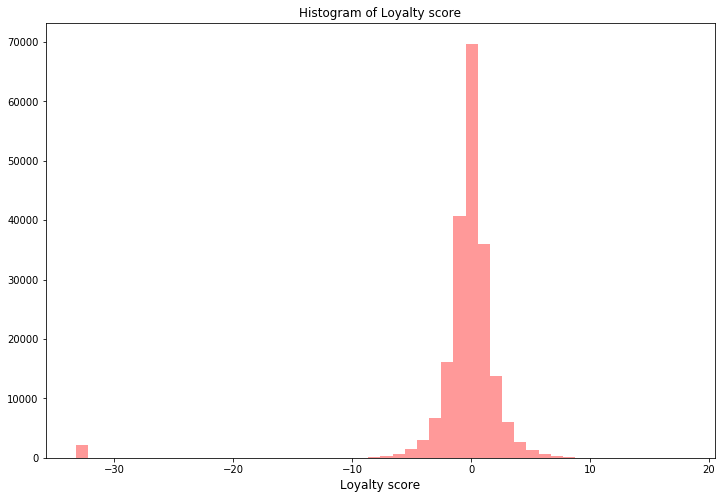

In [62]:
train_df['outliers'] = 0
train_df.loc[train_df['target'] < -30, 'outliers'] = 1
train_df['outliers'].value_counts()

0    199710
1      2207
Name: outliers, dtype: int64

We have around 2207 outliers in our dataset which is around 1.105% of the dataset. This is a very skewed distribution and the outliers penalise our metric RMSE heavily as they have huge variance with non-outliers. It's important to retain them in our dataset instead of deleting them. Later we will learn how to build models with and without outliers and optimise both models to improve our prediction accuracy.

### Target encode the outliers 

In [63]:
train_df.shape, test_df.shape

((201917, 386), (123623, 384))

In [64]:
gc.collect()

1120

In [65]:
for f in ['feature_1','feature_2','feature_3']:
    order_label = train_df.groupby([f])['outliers'].mean()
    train_df[f] = train_df[f].map(order_label)
    test_df[f] = test_df[f].map(order_label)

In [66]:
train_df.to_feather('train_df_alpha')
test_df.to_feather('test_df_alpha')

In [128]:
train_df = feather.read_dataframe('train_df_alpha')
test_df = feather.read_dataframe('test_df_alpha')

### Scrap pad

In [140]:
new_hist_trans['month_lag'].describe()

count    1.963031e+06
mean     1.476515e+00
std      4.994483e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: month_lag, dtype: float64

In [135]:
new_hist_trans[['month_diff', 'month_lag', 'purchase_date', 'card_id']].head()

,month_diff,month_lag,purchase_date,card_id
0,24,1,2017-03-01 03:24:51,C_ID_7c628841cb
1,24,1,2017-03-01 11:01:06,C_ID_25d399500c
2,24,1,2017-03-01 11:27:39,C_ID_e3542c52f1
3,24,1,2017-03-01 11:55:11,C_ID_fabd47ca44
4,24,1,2017-03-01 12:37:26,C_ID_6f9a771d17


In [139]:
hist_trans[['month_diff']].describe()

,month_diff
count,2.911236e+07
mean,1.269206e+01
std,2.007556e+00
min,1.100000e+01
25%,1.200000e+01
50%,1.200000e+01
75%,1.200000e+01
max,2.400000e+01


In [137]:
train_df[train_df['card_id'] == 'C_ID_7c628841cb'][['card_id', 'observation_date_old']]

,card_id,observation_date_old
59734,C_ID_7c628841cb,2017-03-01


In [82]:
train_df['observation_date_old'].nunique()

13

In [79]:
train_df['observation_date_old'].isnull().sum()

0

In [81]:
train_df[train_df['outliers'] == 1]['observation_date_old'].nunique()

11

In [83]:
train_df[train_df['outliers'] == 1]['first_active_month'].nunique()

65

In [84]:
train_df['first_active_month'].nunique()

75

In [85]:
test_df['first_active_month'].nunique()

75

In [89]:
pd.set_option('display.max_rows', 100)

In [107]:
new_hist_sorted[new_hist_sorted['card_id'] == 'C_ID_00007093c1']['purchase_amount'].head(2).sum()

-1.32852396

In [117]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)


In [11]:
new_hist_trans['merchant_category_id'].nunique()

314

In [12]:
new_hist_trans['merchant_id'].nunique()

226129

In [24]:
new_hist_trans[new_hist_trans['category_1'] == 1]['merchant_category_id'].nunique()

209

In [25]:
new_hist_trans[new_hist_trans['category_1'] == 0]['merchant_category_id'].nunique()

311

In [26]:
new_hist_trans['merchant_category_id'].nunique()

314

In [45]:
pd.set_option('display.max_rows', 500)

In [47]:
outliers_df = train_df[train_df['outliers'] == 1]

In [48]:
non_outliers_df = train_df[train_df['outliers'] == 0]

In [50]:
outliers_df_summary = DataFrameSummary(outliers_df).summary().T

In [51]:
non_outliers_df_summary = DataFrameSummary(non_outliers_df).summary().T

In [59]:
non_outliers_df_summary.T['merchant_id_nunique_old']

count            199710
mean            33.7506
std             30.7368
min                   1
25%                  13
50%                  25
75%                  44
max                 398
counts           199710
uniques             313
missing               0
missing_perc         0%
types           numeric
Name: merchant_id_nunique_old, dtype: object

###  Transform purchase_value to actual amount

In [60]:
new_hist_trans['purchase_amount_new'] = np.round(new_hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)
hist_trans['purchase_amount_new'] = np.round(hist_trans['purchase_amount'] / 0.00150265118 + 497.06,2)

In [121]:
new_hist_trans_purchase_aggs = new_hist_trans.groupby('card_id').agg({
    'purchase_amount_new': [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                            ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                            ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                            ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                            ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                            ('hmean', scipy.stats.hmean)]
})

In [125]:
new_hist_trans_purchase_aggs.columns = [ '_'.join(c).strip() for c in new_hist_trans_purchase_aggs.columns.values]

In [114]:
hist_trans.loc[hist_trans['purchase_amount_new'] == 0, 'purchase_amount_new'] = 0.0001

In [124]:
hist_trans_purchase_aggs = hist_trans.groupby('card_id').agg({
        'purchase_amount_new': [('sum', 'sum'), ('pct_75', lambda x: np.percentile(x, q = 75)), 
                                ('pct_25', lambda x: np.percentile(x, q = 25)), ('mean', 'mean'), 
                                ('median', 'median'), ('max', 'max'), ('min', 'min'), ('var', 'var'), 
                                ('skew', 'skew'), ('head_sum', head_sum), ('head_max', head_max), 
                                ('tail_sum', tail_sum), ('tail_max', tail_max), ('gmean', scipy.stats.gmean ),
                                ('hmean', scipy.stats.hmean)]
    })
hist_trans_purchase_aggs.columns = [ '_'.join(c).strip() for c in hist_trans_purchase_aggs.columns.values]

In [129]:
hist_trans_purchase_aggs.reset_index().to_feather('hist_trans_purchase_aggs_alpha')
new_hist_trans_purchase_aggs.reset_index().to_feather('new_hist_trans_purchase_aggs_alpha')

In [147]:
train_df.shape, test_df.shape, hist_trans_purchase_aggs.shape, new_hist_trans_purchase_aggs.shape

((201917, 357), (123623, 355), (325540, 15), (290001, 15))

In [148]:
train_df = join_dfs(train_df, hist_trans_purchase_aggs, left_on='card_id', suffix='_old')
train_df = join_dfs(train_df, new_hist_trans_purchase_aggs, left_on='card_id')

In [149]:
test_df = join_dfs(test_df, hist_trans_purchase_aggs, left_on='card_id', suffix='_old')
test_df = join_dfs(test_df, new_hist_trans_purchase_aggs, left_on='card_id')

In [139]:
hist_trans_purchase_aggs.columns.values

array(['purchase_amount_new_sum', 'purchase_amount_new_pct_75', 'purchase_amount_new_pct_25',
       'purchase_amount_new_mean', 'purchase_amount_new_median', 'purchase_amount_new_max',
       'purchase_amount_new_min', 'purchase_amount_new_var', 'purchase_amount_new_skew',
       'purchase_amount_new_head_sum', 'purchase_amount_new_head_max', 'purchase_amount_new_tail_sum',
       'purchase_amount_new_tail_max', 'purchase_amount_new_gmean', 'purchase_amount_new_hmean'],
      dtype=object)

In [150]:
for df in [train_df, test_df]:
    df['purchase_amount_new_sum_total'] = df['purchase_amount_new_sum'] + df['purchase_amount_new_sum_old']
    df['purchase_amount_new_sum_ratio'] = df['purchase_amount_new_sum'] / df['purchase_amount_new_sum_old']
    df['purchase_amount_new_pct_75_ratio'] = df['purchase_amount_new_pct_75'] / df['purchase_amount_new_pct_75_old']
    df['purchase_amount_new_pct_25_ratio'] = df['purchase_amount_new_pct_25'] / df['purchase_amount_new_pct_25_old']
    df['purchase_amount_new_inter_quartile'] = df['purchase_amount_new_pct_75'] - df['purchase_amount_new_pct_25']
    df['purchase_amount_new_inter_quartile_old'] = df['purchase_amount_new_pct_75_old'] - df['purchase_amount_new_pct_25_old']
    df['purchase_amount_new_inter_quartile_ratio'] = df['purchase_amount_new_inter_quartile'] / df['purchase_amount_new_inter_quartile_old']
    df['purchase_amount_new_mean_total'] = df['purchase_amount_new_mean'] + df['purchase_amount_new_mean_old']
    df['purchase_amount_new_mean_ratio'] = df['purchase_amount_new_mean'] / df['purchase_amount_new_mean_old']
    df['purchase_amount_new_median_ratio'] = df['purchase_amount_new_median'] / df['purchase_amount_new_median_old']
    df['purchase_amount_new_max_total'] = df['purchase_amount_new_max'] + df['purchase_amount_new_max_old']
    df['purchase_amount_new_min_total'] = df['purchase_amount_new_min'] + df['purchase_amount_new_min_old']
    df['purchase_amount_new_skew_ratio'] = df['purchase_amount_new_skew'] / df['purchase_amount_new_skew_old']
    df['purchase_amount_new_before_after_ratio'] = df['purchase_amount_new_head_sum'] / df['purchase_amount_new_tail_sum_old']
    df['purchase_amount_new_first_last_diff'] = df['purchase_amount_new_tail_sum'] - df['purchase_amount_new_head_max_old']
    df['purchase_amount_new_fi_last_old_total'] = df['purchase_amount_new_tail_sum'] -  df['purchase_amount_new_head_sum']
    df['purchase_amount_new_fi_last_new_total'] = df['purchase_amount_new_tail_sum_old'] -  df['purchase_amount_new_head_max_old']
    df['purchase_amount_new_gmean_total'] = df['purchase_amount_new_gmean'] + df['purchase_amount_new_gmean_old']
    df['purchase_amount_new_hmean_total'] = df['purchase_amount_new_hmean'] + df['purchase_amount_new_hmean_old']
    df['purchase_amount_new_gmean_ratio'] = df['purchase_amount_new_gmean'] / df['purchase_amount_new_gmean_old']
    df['purchase_amount_new_hmean_ratio'] = df['purchase_amount_new_hmean'] / df['purchase_amount_new_hmean_old']
    df['purchase_amount_sum_total'] = df['purchase_amount_sum'] + df['purchase_amount_sum_old']
    df['purchase_amount_sum_ratio'] = df['purchase_amount_sum'] / df['purchase_amount_sum_old']
    df['purchase_amount_pct_75_ratio'] = df['purchase_amount_pct_75'] / df['purchase_amount_pct_75_old']
    df['purchase_amount_pct_25_ratio'] = df['purchase_amount_pct_25'] / df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile'] = df['purchase_amount_pct_75'] - df['purchase_amount_pct_25']
    df['purchase_amount_inter_quartile_old'] = df['purchase_amount_pct_75_old'] - df['purchase_amount_pct_25_old']
    df['purchase_amount_inter_quartile_ratio'] = df['purchase_amount_inter_quartile'] / df['purchase_amount_inter_quartile_old']
    df['purchase_amount_mean_total'] = df['purchase_amount_mean'] + df['purchase_amount_mean_old']
    df['purchase_amount_mean_ratio'] = df['purchase_amount_mean'] / df['purchase_amount_mean_old']
    df['purchase_amount_median_ratio'] = df['purchase_amount_median'] / df['purchase_amount_median_old']
    df['purchase_amount_max_total'] = df['purchase_amount_max'] + df['purchase_amount_max_old']
    df['purchase_amount_min_total'] = df['purchase_amount_min'] + df['purchase_amount_min_old']
    df['purchase_amount_skew_ratio'] = df['purchase_amount_skew'] / df['purchase_amount_skew_old']
    df['purchase_amount_before_after_ratio'] = df['purchase_amount_head_sum'] / df['purchase_amount_tail_sum_old']
    df['purchase_amount_first_last_diff'] = df['purchase_amount_tail_sum'] - df['purchase_amount_head_max_old']
    df['purchase_amount_fi_last_old_total'] = df['purchase_amount_tail_sum'] -  df['purchase_amount_head_sum']
    df['purchase_amount_fi_last_new_total'] = df['purchase_amount_tail_sum_old'] -  df['purchase_amount_head_max_old']

In [151]:
train_df.shape, test_df.shape

((201917, 424), (123623, 422))

In [152]:
train_df.to_feather('train_df_alpha')
test_df.to_feather('test_df_alpha')